In [1]:
# DRAW 2D NEMO FIELD ON MAP PROJECTION
# GM 7/10/16: Currently writing script to visualise mean dynamic topography in Arctic, but it will be generalised to plot any 2D field in any region

In [2]:
import numpy as np
import matplotlib
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.tri as tri
from netCDF4 import Dataset
from mpl_toolkits.basemap import Basemap

In [3]:
# SPECIFY VARIABLE THAT YOU WISH TO PLOT
varname = 'sossheig'

In [8]:
# DATA LOCATION
# Point to location where NEMO netcdf file is held
rootdir = '/Volumes/ocean2-1/graemem/arctic_carbon/'
filename = 'ORCA12.L46-MJM88_y2008_gridT.nc'

In [ ]:
# LOAD DATA
# Including desired variable and latitude and longitude
data=Dataset(rootdir+filename,'r')
var = data.variables[varname][0,:,:]
nav_lon = data.variables['nav_lon'][:,:]
nav_lat = data.variables['nav_lat'][:,:]
print var.shape

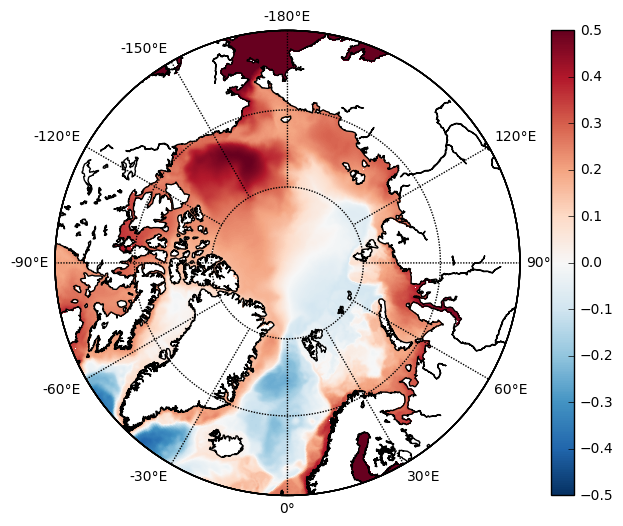

In [13]:
# PLOT THE VARIABLE
vmin = -0.5
vmax = 0.5
levels = np.arange(vmin,vmax+0.5,0.5)

fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(111)
map1 = Basemap(projection='npstere',lon_0 = 0,boundinglat = 60,round=True,resolution='l')
map1.drawcoastlines()
map1.drawparallels(np.arange(60,90,10))
map1.drawmeridians(np.arange(-180,150,30),labels=[1,1,0,0],fontsize=10)
x,y = map1(nav_lon,nav_lat)

pc = map1.contourf(x,y,var,vmin=vmin,vmax=vmax,cmap=plt.cm.RdBu_r)
cb = plt.colorbar(pc,ax=ax)

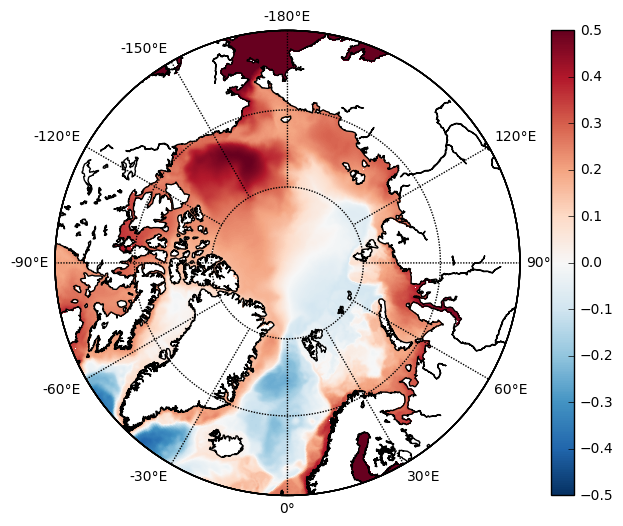

In [11]:
# SAVE FIGURE
plt.savefig('/home/ocean2/graemem/arctic_carbon/figures/pcolor_MDT_arctic.pdf',transparent=True)